In [47]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import NMF

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

In [48]:
#FUNCTIONS


def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
 
    H, W, C = img.shape                      # (100, 100, 3)
    img = img.numpy().astype(np.float32) / 255.0     # non-negative
    X = img.reshape(H, W * C)    
    print(X.min())
                # → (100, 300)   2-D, non-negative
    nmf = NMF(n_components=40, init="nndsvda", max_iter=400)
    Ww = nmf.fit_transform(X)                 # (100, 50)
    Hmat = nmf.components_                   # (50, 300)
 
    # low-rank reconstruction back to image
    img_lowrank = Ww @ Hmat
    img_lowrank = img_lowrank.reshape(H, W, C)  
 
    # Return image
    return img_lowrank

def flip(image):
    image

    flipped=[]
    for r in range(len(image[:])):
        row=[]
        for i in range(len(image[r])):
            row.append(image[-r][-i])
        flipped.append(row)
    return flipped

def reduce(image,amount):

    reduced=[]

    #we pick out only a select number of the pixels from the image.


    row_list=np.linspace(0,len(image[:]),int((len(image[:]))/ amount ))
    row_indexes=[]
    for i in range(len(row_list)):
        row_indexes.append(int(row_list[i]))


    column_list=np.linspace(0,len(image[0]),int((len(image[0]))/ amount ))
    column_indexes=[]
    for i in range(len(column_list)):
        column_indexes.append(int(column_list[i]))


    for r in range(len(image[:])):
    
        if r in row_indexes:
        
            row=[]
            for i in range(len(image[r])):
                if i in column_indexes:
                    row.append(image[r][i])

    
            reduced.append(row)
    return reduced


In [49]:
DATASET=os.listdir('DATASET/train')

DATASET=os.listdir('DATASET/train')

SET=[]
for j in range(len(DATASET)):
    person=DATASET[j]
    folder=os.listdir('DATASET/train/' + person)

    image_list= []
    for i in range(len(folder)):
        image_list.append(preprocess('DATASET/train/' + person + '/' + folder[i]))
    SET.append(image_list)

In [50]:
# SET LOFT FOR GPU
#We want to avoid out-of-memory errors by creating a sealing to GPU usage

gpus = tf.config.experimental.list_physical_devices('GPU') #defining/naming my gpu in python
 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) #setting a loft on it so it doesn't go crazy with memory, leading to oom errors




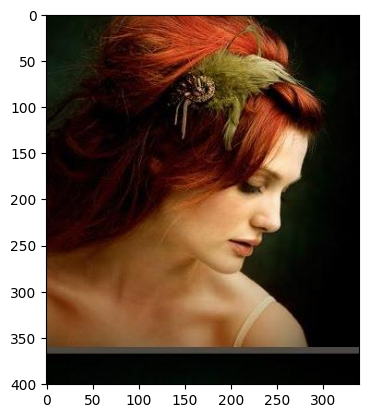

In [51]:
image=iio.imread('DATASET/train/n000002/0018_04.jpg')
plt.imshow(image)

In [52]:
#MAKE FILE STRUCTURE

POS_PATH = os.path.join('data','positive')
NEG_PATH = os.path.join('data','negative')
ANC_PATH = os.path.join('data','anchor')

#directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)



FileExistsError: [Errno 17] File exists: 'data/positive'

In [ ]:
for directory in os.list.dir('DATASET/train'):
    for file in os.listdir('DATASET/train', directory):
        EX_PATH=os.path.join('DATASET/train',directory, file)
        NEW_PATH=os.path.join(NEG_PATH,file)
        os.replace(EX_PATH,NEW_PATH)